<a href="https://colab.research.google.com/github/Brandonj171/Brandonj171/blob/main/FASHIONMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
from tensorflow.keras.datasets import fashion_mnist

In [44]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [45]:
X_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [46]:
X_test.shape

(10000, 28, 28)

In [47]:
y_test.shape

(10000,)

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)

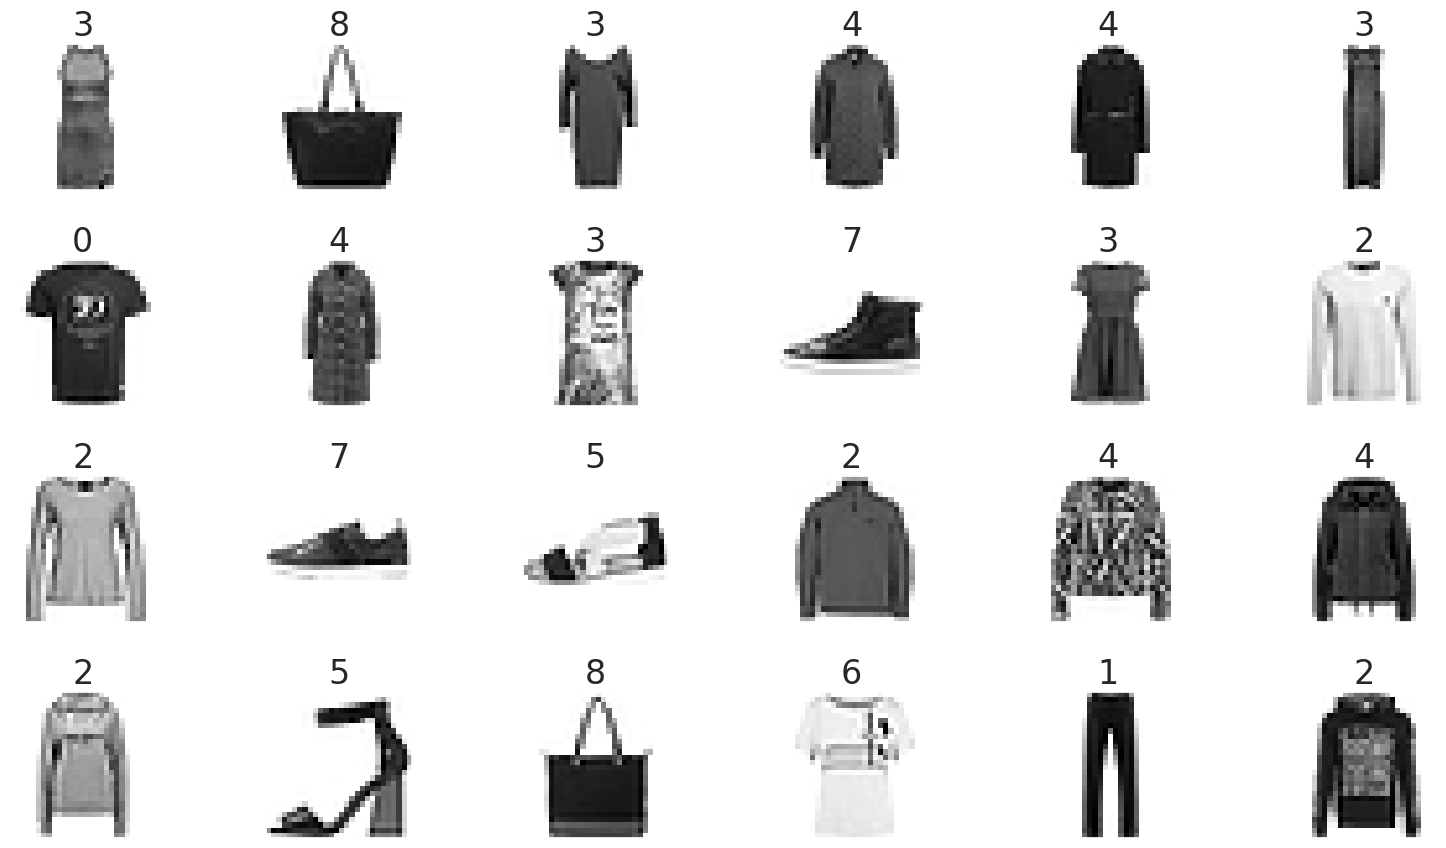

In [49]:
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16,9))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
  axes, image, target = item
  axes.imshow(image, cmap=plt.cm.gray_r)
  axes.set_xticks([])
  axes.set_yticks([])
  axes.set_title(target)
plt.tight_layout()

In [50]:
X_train = X_train.reshape((60000, 28, 28, 1))
X_train.shape
(60000, 28, 28, 1)
X_test = X_test.reshape((10000, 28, 28, 1))
X_test.shape
(10000, 28, 28, 1)

(10000, 28, 28, 1)

In [51]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [52]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_train.shape

(60000, 10)

In [53]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [54]:
y_test = to_categorical(y_test)

In [55]:
y_test.shape

(10000, 10)

In [57]:
from tensorflow.keras.models import Sequential
cnn = Sequential()

In [58]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPool2D

In [59]:
cnn.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [60]:
from tensorflow.keras.layers import MaxPooling2D

cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [61]:
cnn.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

In [62]:
cnn.add(Flatten())

In [63]:
cnn.add(Dense(units=128, activation='relu'))

In [64]:
cnn.add(Dense(units=10, activation='softmax'))

In [65]:
cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 485,514 (1.85 MB)

 Trainable params: 485,514 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

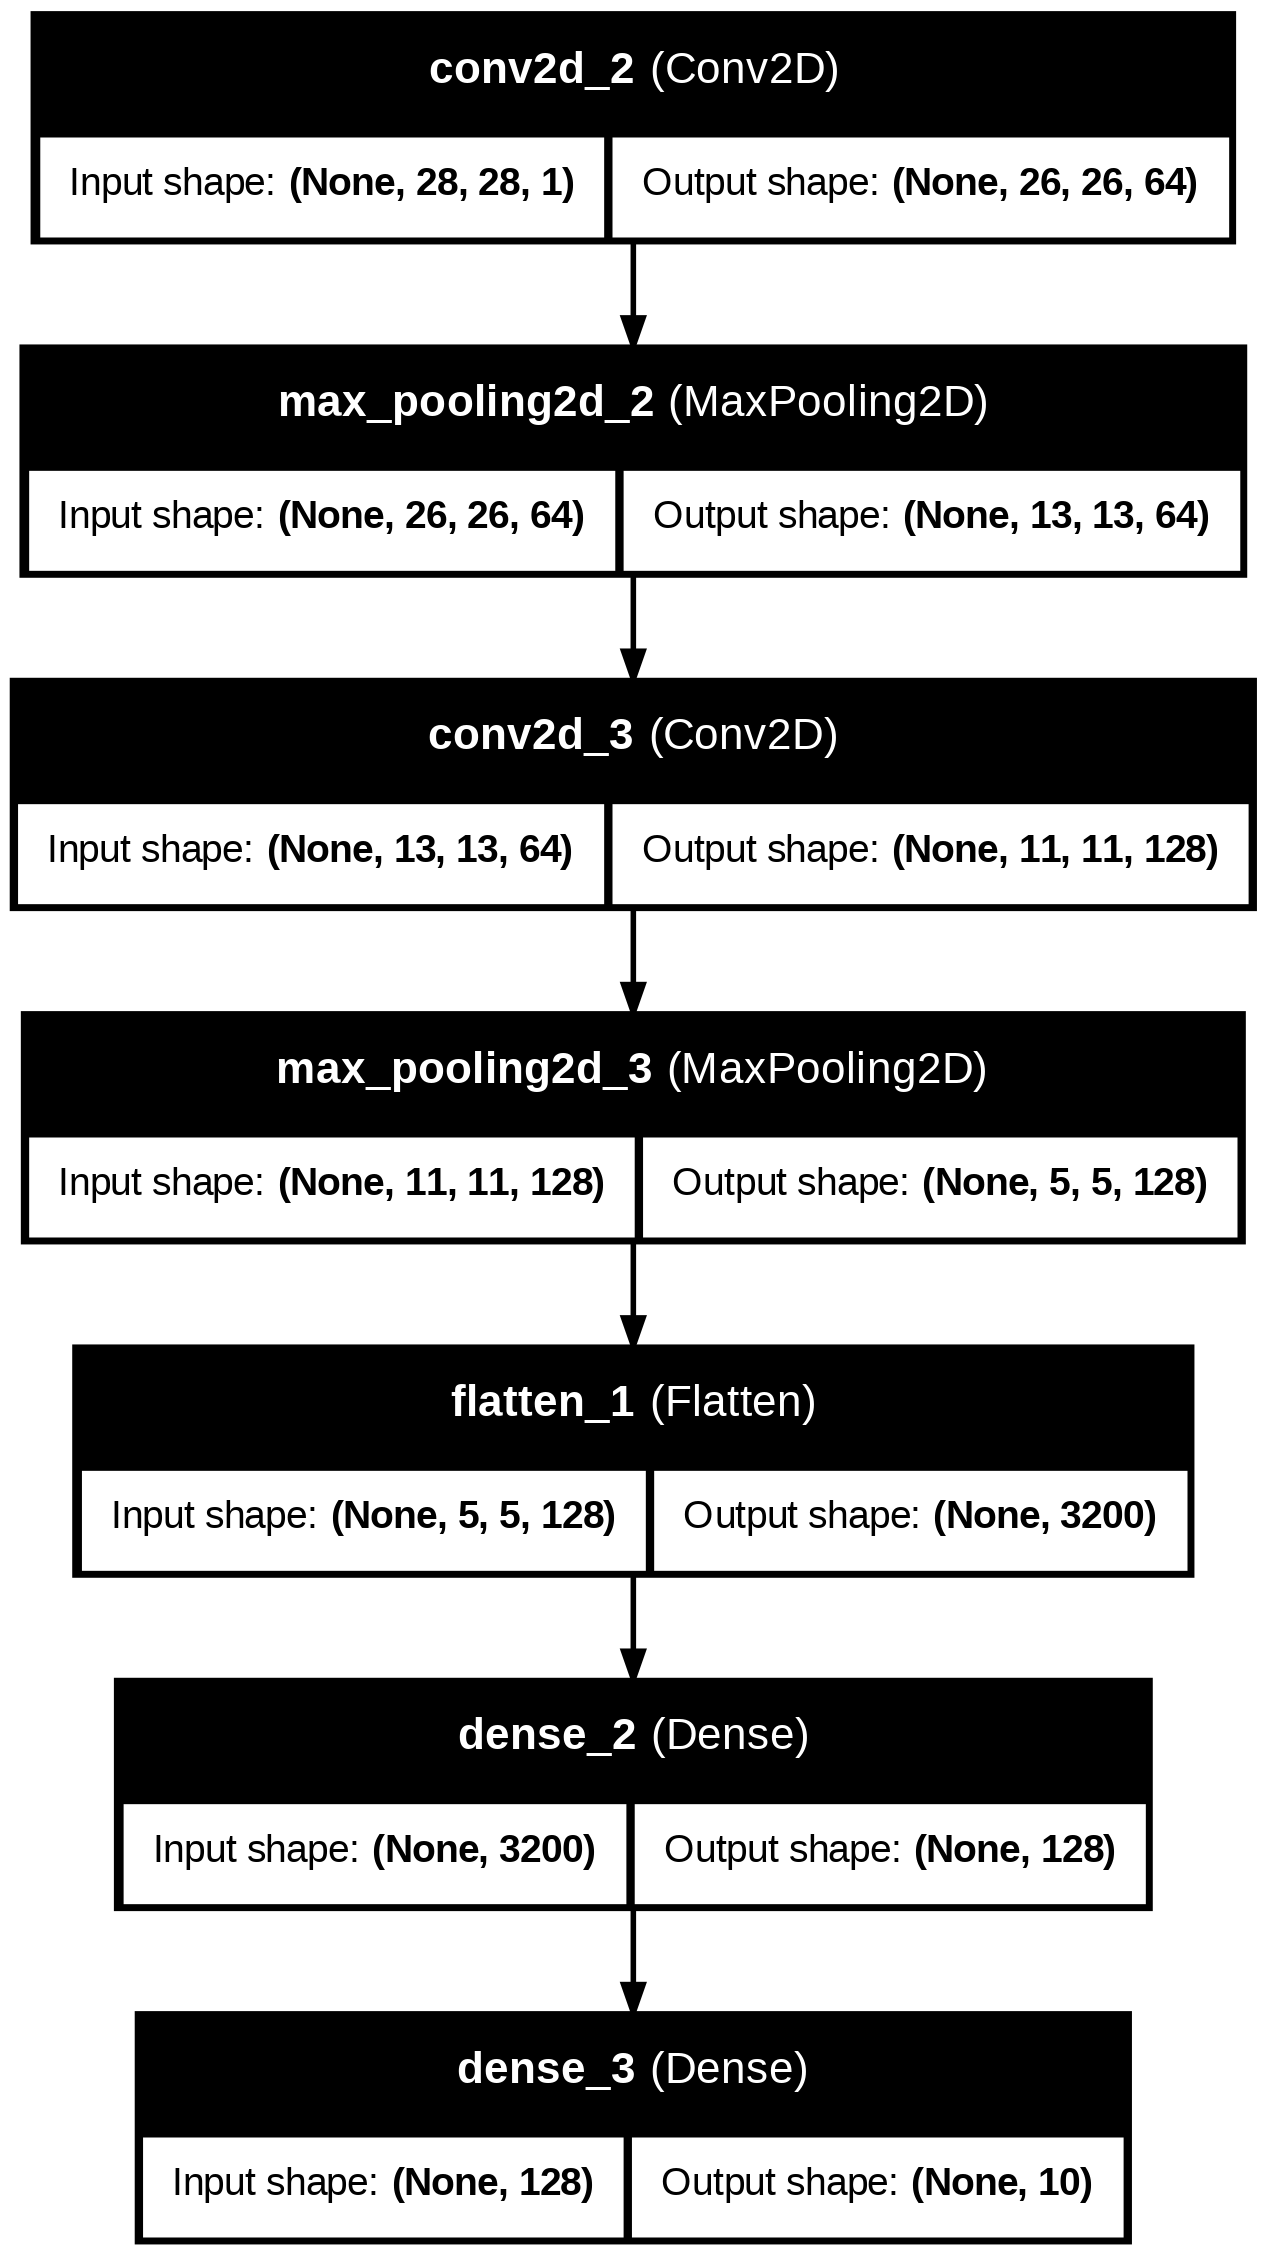

In [66]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='convet.png', show_shapes=True,
           show_layer_names=True)
Image(filename='convet.png')

In [67]:
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [69]:
cnn.fit(X_train, y_train, epochs=5, batch_size=64,
        validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 125s 148ms/step - accuracy: 0.8855 - loss: 0.3164 - val_accuracy: 0.8842 - val_loss: 0.3005
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 131s 136ms/step - accuracy: 0.9041 - loss: 0.2633 - val_accuracy: 0.9050 - val_loss: 0.2570
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 145s 139ms/step - accuracy: 0.9163 - loss: 0.2257 - val_accuracy: 0.9070 - val_loss: 0.2495
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 117s 139ms/step - accuracy: 0.9250 - loss: 0.1987 - val_accuracy: 0.9082 - val_loss: 0.2673
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 140s 137ms/step - accuracy: 0.9379 - loss: 0.1708 - val_accuracy: 0.9095 - val_loss: 0.2453


In [70]:
loss, accuracy = cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.9031 - loss: 0.2668


In [71]:
loss

0.2634490728378296

In [72]:
accuracy

0.90420001745224

Our CNN model achieved 99.01% accuracy with a loss of 0.0308 on MNIST, while on Fashion-MNIST, it reached 90.31% accuracy with a loss of 0.2668. This shows that recognizing handwritten digits is much easier for the model than distinguishing clothing items, where similar categories (e.g., shirts vs. t-shirts) lead to misclassification. Additionally, training on Fashion-MNIST took slightly longer due to its greater feature complexity, although both datasets have the same input dimensions.

In [73]:
predictions = cnn.predict(X_test)
y_test[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [74]:
for index, probability in enumerate(predictions[0]):
  print(f'{index}: {probability:.10%}')

0: 0.0000021641%
1: 0.0000195491%
2: 0.0000176117%
3: 0.0000004093%
4: 0.0000027746%
5: 0.0019044513%
6: 0.0000042316%
7: 0.0060493272%
8: 0.0000149040%
9: 99.9919831753%


In [75]:
images = X_test.reshape((10000, 28, 28))
incorrect_predictions = []
for i, (p, e) in enumerate(zip(predictions, y_test)):
  predicted, expected = np.argmax(p), np.argmax(e)

  if predicted != expected:
    incorrect_predictions.append(
        (i, images[i], predicted, expected))

In [76]:
len(incorrect_predictions)

958

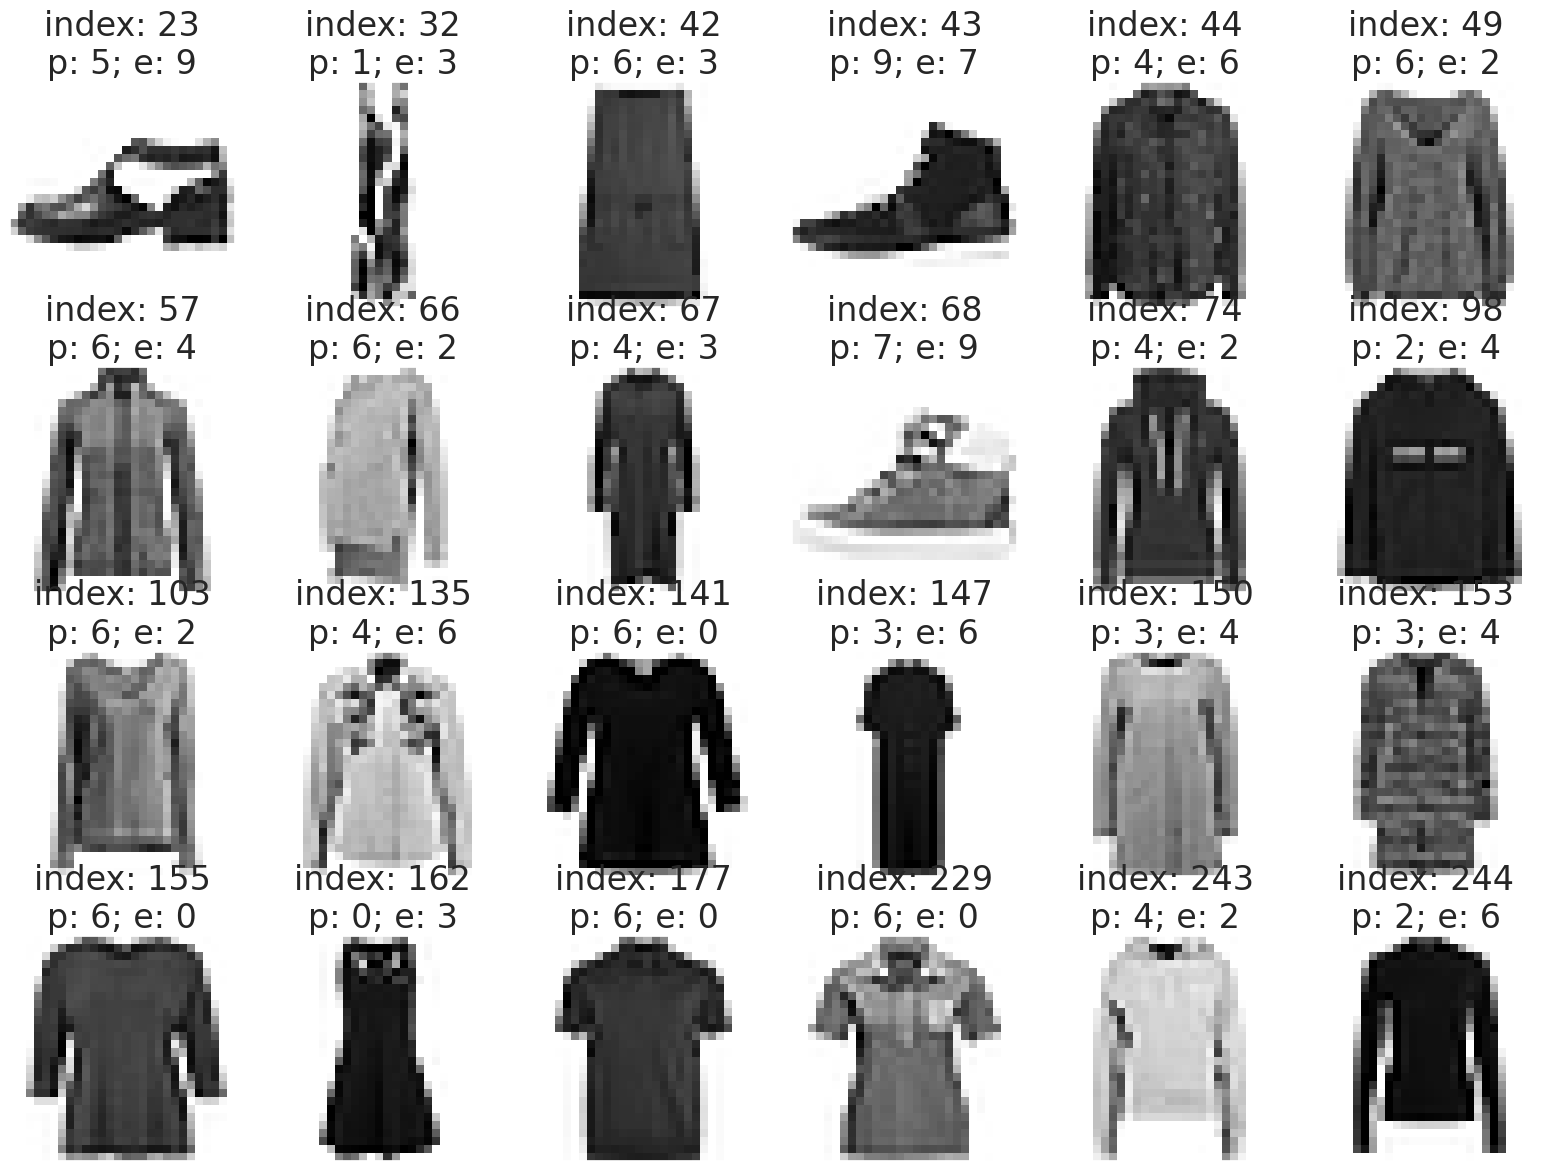

In [77]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16,12))
for axes, item in zip(axes.ravel(), incorrect_predictions):
  index, image, predicted, expected = item
  axes.imshow(image, cmap=plt.cm.gray_r)
  axes.set_xticks([])
  axes.set_yticks([])
  axes.set_title(
      f'index: {index}\np: {predicted}; e: {expected}')
  plt.tight_layout()

In [78]:
def display_probabilities(prediction):
  for index, probability in enumerate(prediction):
    print(f'{index}: {probability:.10%}')

In [79]:
display_probabilities(predictions[583])

0: 0.0000000221%
1: 0.0000000124%
2: 0.0000015487%
3: 0.0000000451%
4: 0.0000004655%
5: 0.0000253718%
6: 0.0000000736%
7: 0.0351158204%
8: 0.0000037416%
9: 99.9648571014%


In [80]:
display_probabilities(predictions[625])

0: 99.8994588852%
1: 0.0000546486%
2: 0.0185908750%
3: 0.0028268101%
4: 0.0003148028%
5: 0.0000017952%
6: 0.0787519908%
7: 0.0000000017%
8: 0.0000102396%
9: 0.0000020381%


In [81]:
display_probabilities(predictions[495])

0: 0.0003815438%
1: 0.0000432676%
2: 0.0077401484%
3: 0.0006321263%
4: 0.0020761521%
5: 67.0791268349%
6: 0.0095649928%
7: 0.0051246814%
8: 0.0000110906%
9: 32.8953027725%


In [82]:
cnn.save('mnist_cnn.h5')

In [83]:
from tensorflow.keras.models import load_model
cnn = load_model('mnist_cnn.h5')

Adding a Dense layer with 4096 neurons can improve prediction accuracy by allowing the model to learn more complex patterns, but it may also lead to overfitting if the dataset is simple. Training time will increase due to the additional parameters, making each epoch longer and requiring more memory. Similarly, inference speed will decrease because the model needs to process more neurons for each prediction, which can be a drawback in real-time applications. Balancing model complexity with available data and resources is important for optimizing performance.